# Cheater approximation

This notebook aims at exploring how many cheaters are in the dataset.

## Loading libraries and setting paths

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json
import os

DATA_PATH = Path(r"D:\Research project\parsed_data")
NO_CHEATER_PATH = Path.joinpath(DATA_PATH, 'no_cheater_present')
CHEATER_PATH = Path.joinpath(DATA_PATH, 'with_cheater_present')

EVENT_FILE_TYPE = ".json"
TICK_FILE_TYPE = ".parquet"

print(f"Cheater path     : {CHEATER_PATH}")
print(f"No cheaters path : {NO_CHEATER_PATH}")

Cheater path     : D:\Research project\parsed_data\with_cheater_present
No cheaters path : D:\Research project\parsed_data\no_cheater_present


This next piece of code will help us load json files

In [2]:
# Loading json event data a list of tuples (str, pd.Dataframe)
def json_2_eventlist(filepath:str) -> list[tuple[str, pd.DataFrame]]:   
    with open(filepath, "r") as f:
        json_data = json.load(f)

    data = []       

    for key, value in json_data.items():
        if isinstance(value, list):
            df = pd.DataFrame(value)
            data.append((key, df))

    return data


In [ ]:
def plot_piechart(labels, values, title):

    def value_and_pct(val):
        total = sum(values)
        absolute = int(round(val / 100 * total))
        return f'{labels.pop(0)}\n{absolute} ({val:.1f}%)'

    fig, ax = plt.subplots(figsize=(4,4))
    ax.set_title(title)

    wedges, texts, autotexts = ax.pie(
        values,
        labels=None,
        autopct=lambda val: value_and_pct(val),  
        startangle=90,
        textprops={'fontsize': 10}
    )

    ax.axis('equal')
    plt.tight_layout()
    plt.show()

## Data exploring

Number of cheaters in cheater data

Number of identified cheaters: 1309
Number of non-cheaters:        1861
Number of total players:       3170


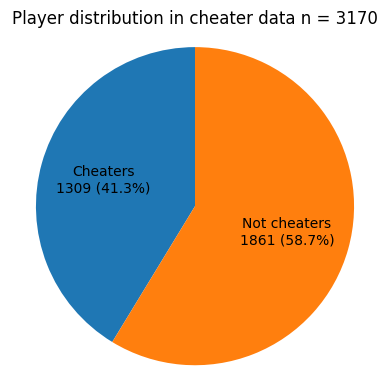

In [28]:
ncd_num_cheaters = 0
ncd_num_players = 0
cheaters = "cheaters"

for json_file in CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):

    event_list =json_2_eventlist(json_file)
    cheater_df = next((t for t in event_list if t[0] == cheaters), None)[1]

    ncd_num_cheaters = ncd_num_cheaters + cheater_df.shape[0]

    ncd_num_players = ncd_num_players + 10

num_norm_players = ncd_num_players - ncd_num_cheaters

print(f"Number of identified cheaters: {ncd_num_cheaters}")
print(f"Number of non-cheaters:        {num_norm_players}")
print(f"Number of total players:       {ncd_num_players}")

labels = ["Cheaters", "Not cheaters"]
values = [ncd_num_cheaters, num_norm_players]
title = f"Player distribution in cheater data n = {ncd_num_players}"
plot_piechart(labels, values, title)


Number of total players:       4780


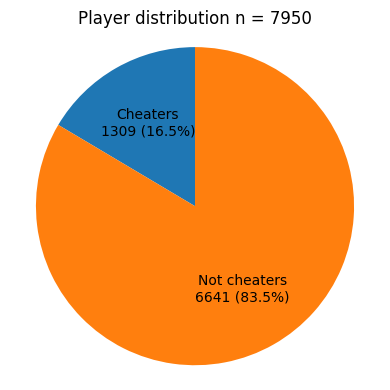

In [30]:
cd_num_cheaters = 0
cd_num_players = 0

for json_file in NO_CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    
    cd_num_players = cd_num_players + 10

print(f"Number of total players:       {cd_num_players}")

labels = ["Cheaters", "Not cheaters"]
values = [ncd_num_cheaters, num_norm_players + cd_num_players]
title = f"Player distribution n = {cd_num_players + ncd_num_players}"
plot_piechart(labels, values, title)


The number of deaths caused by a player

Number of kills caused by a cheater:       19256
Number of kills caused by a normal player: 12433
Number of total kills:                     31689


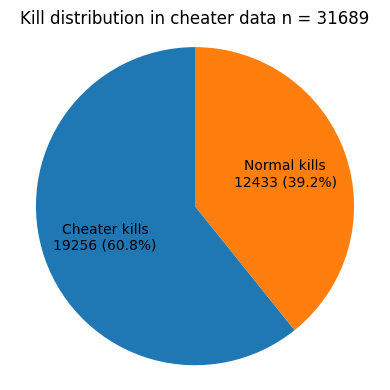

In [44]:

# Finds the number of deaths caused by a cheater

# event of interest
eoi = "player_death"
cheaters = "cheaters"
cd_total_kills = 0
cheater_kills = 0

for json_file in CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    event_list =json_2_eventlist(json_file)
    
    event_df = next((t for t in event_list if t[0] == eoi), None)[1]
    cheater_df = next((t for t in event_list if t[0] == cheaters), None)[1]
    
    cd_total_kills = cd_total_kills + event_df.shape[0]
    cheater_kills = cheater_kills + event_df[event_df['attacker_steamid'].isin(cheater_df['steamid'])].shape[0]


print(f"Number of kills caused by a cheater:       {cheater_kills}")
print(f"Number of kills caused by a normal player: {cd_total_kills - cheater_kills}")
print(f"Number of total kills:                     {cd_total_kills}")


labels = ["Cheater kills", "Normal kills"]
values = [cheater_kills, cd_total_kills - cheater_kills]
title = f"Kill distribution in cheater data n = {cd_total_kills}"
plot_piechart(labels, values, title)

The number of players in non-cheater data

Number of total kills in the non cheater data     : 63359
Number of total non cheater kills across datasets : 95048
Number of kills caused by a cheater               : 19256
Number of kills in the dataset                    : 114304


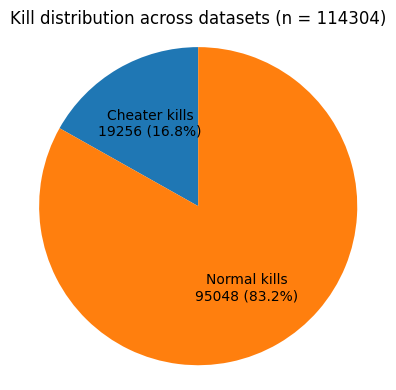

In [45]:
ncd_total_kills = 0

for json_file in NO_CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    event_list =json_2_eventlist(json_file)
    
    event_df = next((t for t in event_list if t[0] == eoi), None)[1]

    ncd_total_kills = ncd_total_kills + event_df.shape[0]

total_nc_kills = ncd_total_kills + cd_total_kills

print(f"Number of total kills in the non cheater data     : {ncd_total_kills}")
print(f"Number of total non cheater kills across datasets : {total_nc_kills}")
print(f"Number of kills caused by a cheater               : {cheater_kills}")
print(f"Number of kills in the dataset                    : {total_nc_kills + cheater_kills}")

labels = ["Cheater kills", "Normal kills"]
values = [cheater_kills, total_nc_kills]
title = f"Kill distribution across datasets (n = {total_nc_kills + cheater_kills})"

plot_piechart(labels, values, title)